In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p /content/data  # 创建目标文件夹，如果不存在
!cp "/content/drive/MyDrive/CS 549/Blood dataset/blood.zip" "/content/data/"

In [ ]:
!unzip /content/data/blood.zip -d /content/data/

Archive:  /content/data/blood.zip
replace /content/data/blood/hard_cases/txt/img_hod_000266.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pwd

/content


In [ ]:
# Setting up the name for normal case training
name = '/content/data/blood/normal_cases'

In [ ]:
# Importing required libraries
import os
import xml.etree.ElementTree as ET

# Specifying the directory path for annotations
directory_path = name  + '/xml'

In [ ]:
def remove_spaces_from_tags(dir_path):
    for filename in os.listdir(dir_path):
        if filename.lower().endswith('.xml'):
            filepath = os.path.join(dir_path, filename)

            # Parsing the XML file
            tree = ET.parse(filepath)
            root = tree.getroot()

            # Removing spaces from <filename> and <path> tags
            for tag in ['filename', 'path']:
                element = root.find(tag)
                if element is not None:
                    # 공백 제거
                    element.text = element.text.replace(" ", "")

            # Saving the changes back to the XML file
            tree.write(filepath)
            print(f"Changed file: {filename}")

# Executing the function to preprocess XML annotations
remove_spaces_from_tags(directory_path)

Changed file: img_hod_010578.xml
Changed file: img_hod_005198.xml
Changed file: img_hod_010500.xml
Changed file: img_hod_000855.xml
Changed file: img_hod_000929.xml
Changed file: img_hod_000952.xml
Changed file: img_hod_000645.xml
Changed file: img_hod_004958.xml
Changed file: img_hod_004929.xml
Changed file: img_hod_000171.xml
Changed file: img_hod_000894.xml
Changed file: img_hod_000926.xml
Changed file: img_hod_000813.xml
Changed file: img_hod_005035.xml
Changed file: img_hod_005130.xml
Changed file: img_hod_004870.xml
Changed file: img_hod_004853.xml
Changed file: img_hod_000119.xml
Changed file: img_hod_005209.xml
Changed file: img_hod_000896.xml
Changed file: img_hod_004976.xml
Changed file: img_hod_000948.xml
Changed file: img_hod_000780.xml
Changed file: img_hod_000751.xml
Changed file: img_hod_005279.xml
Changed file: img_hod_000180.xml
Changed file: img_hod_000050.xml
Changed file: img_hod_000366.xml
Changed file: img_hod_000060.xml
Changed file: img_hod_000876.xml
Changed fi

In [ ]:
# Checking the version of PyTorch
import torch
print(torch.__version__)

1.13.0+cu116


In [ ]:
# Downgrading PyTorch to 1.13.0+cu116 for compatibility with MMDetection
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [ ]:
# Installing mmcv-full
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html


In [ ]:
# Cloning and installing MMDetection (version 2.x)
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Cloning into 'mmdetection'...
remote: Enumerating objects: 38019, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 38019 (delta 39), reused 63 (delta 28), pack-reused 37917
Receiving objects: 100% (38019/38019), 63.24 MiB | 17.97 MiB/s, done.
Resolving deltas: 100% (26205/26205), done.
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packa

In [ ]:
!pip uninstall mmdet -y


Found existing installation: mmdet 3.3.0
Uninstalling mmdet-3.3.0:
  Successfully uninstalled mmdet-3.3.0


In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html


Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html


In [ ]:
!pip install mmdet


In [ ]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [ ]:
!pwd

/content/voc2coco


In [ ]:
# Cloning the voc2coco utility
!git clone https://github.com/yukkyo/voc2coco.git # voc -> cooo

Cloning into 'voc2coco'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 436 (delta 19), reused 11 (delta 11), pack-reused 408
Receiving objects: 100% (436/436), 214.06 KiB | 3.69 MiB/s, done.
Resolving deltas: 100% (390/390), done.


In [ ]:
!pwd

/content/voc2coco


In [ ]:
!cat /content/data/blood/normal_cases/txt/labels.txt

cat: /content/data/blood/normal_cases/txt/labels.txt: No such file or directory


In [ ]:
cd ./voc2coco/

/content/voc2coco/voc2coco


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

def save_names_to_file(names, file_path):
    # 确保目录存在
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    with open(file_path, 'w') as file:
        for name in names:
            file.write(name + '\n')

# 读取CSV文件
df = pd.read_csv('/content/data/blood/metadata.csv')

# 筛选出类别为blood的行
blood_df = df[df['Category'] == 'blood']

blood_df = blood_df[df['Case Type'] == 'Normal']
print(blood_df)

# 只获取图像名称列
image_names = blood_df['Image Name'].str.replace('.jpg', '')  # 移除.jpg后缀

# 分割数据集，这里的比例需要根据你的情况来设置
train_names, test_names = train_test_split(image_names, test_size=0.2, random_state=42)
train_names, val_names = train_test_split(train_names, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# 替换为你的实际文件路径
save_names_to_file(train_names, '/content/data/blood/normal_cases/txt/train.txt')
save_names_to_file(val_names, '/content/data/blood/normal_cases/txt/validation.txt')
save_names_to_file(test_names, '/content/data/blood/normal_cases/txt/test.txt')



     Category Case Type          Image Name Annotation Name (YOLOv5)  \
4381    blood    Normal  img_hod_000040.jpg       img_hod_000040.txt   
4382    blood    Normal  img_hod_000814.jpg       img_hod_000814.txt   
4383    blood    Normal  img_hod_010546.jpg       img_hod_010546.txt   
4384    blood    Normal  img_hod_000708.jpg       img_hod_000708.txt   
4385    blood    Normal  img_hod_004854.jpg       img_hod_004854.txt   
...       ...       ...                 ...                      ...   
4930    blood    Normal  img_hod_000904.jpg       img_hod_000904.txt   
4931    blood    Normal  img_hod_000953.jpg       img_hod_000953.txt   
4932    blood    Normal  img_hod_000782.jpg       img_hod_000782.txt   
4933    blood    Normal  img_hod_000459.jpg       img_hod_000459.txt   
4934    blood    Normal  img_hod_010145.jpg       img_hod_010145.txt   

     Annotation Name (Faster R-CNN)  \
4381             img_hod_000040.xml   
4382             img_hod_000814.xml   
4383             i

<ipython-input-40-7f8f0681b265>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  blood_df = blood_df[df['Case Type'] == 'Normal']
<ipython-input-40-7f8f0681b265>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  image_names = blood_df['Image Name'].str.replace('.jpg', '')  # 移除.jpg后缀


In [42]:
!python voc2coco.py --ann_dir /content/data/blood/normal_cases/xml \
--ann_ids /content/data/blood/normal_cases/txt/train.txt \
--labels /content/data/blood/normal_cases/txt/labels.txt \
--output /content/data/blood/normal_cases/train.json \
--ext xml

!python voc2coco.py --ann_dir /content/data/blood/normal_cases/xml \
--ann_ids /content/data/blood/normal_cases/txt/validation.txt \
--labels /content/data/blood/normal_cases/txt/labels.txt \
--output /content/data/blood/normal_cases/val.json \
--ext xml

!python voc2coco.py --ann_dir /content/data/blood/normal_cases/xml \
--ann_ids /content/data/blood/normal_cases/txt/test.txt \
--labels /content/data/blood/normal_cases/txt/labels.txt \
--output /content/data/blood/normal_cases/test.json \
--ext xml


Start converting !
100% 332/332 [00:00<00:00, 16706.97it/s]
Start converting !
100% 111/111 [00:00<00:00, 17241.97it/s]
Start converting !
100% 111/111 [00:00<00:00, 13868.15it/s]


In [43]:
!cat /content/data/blood/normal_cases/train.json

{"images": [{"file_name": "img_hod_010478.jpg", "height": 213, "width": 320, "id": "img_hod_010478"}, {"file_name": "img_hod_000782.jpg", "height": 408, "width": 612, "id": "img_hod_000782"}, {"file_name": "img_hod_000949.jpg", "height": 408, "width": 612, "id": "img_hod_000949"}, {"file_name": "img_hod_000167.jpg", "height": 408, "width": 612, "id": "img_hod_000167"}, {"file_name": "img_hod_000480.jpg", "height": 408, "width": 612, "id": "img_hod_000480"}, {"file_name": "img_hod_005018.jpg", "height": 750, "width": 500, "id": "img_hod_005018"}, {"file_name": "img_hod_000948.jpg", "height": 408, "width": 612, "id": "img_hod_000948"}, {"file_name": "img_hod_010145.jpg", "height": 626, "width": 417, "id": "img_hod_010145"}, {"file_name": "img_hod_000905.jpg", "height": 408, "width": 612, "id": "img_hod_000905"}, {"file_name": "img_hod_004938.jpg", "height": 750, "width": 500, "id": "img_hod_004938"}, {"file_name": "img_hod_005204.jpg", "height": 333, "width": 500, "id": "img_hod_005204"}

In [44]:
!pwd

/content/voc2coco/voc2coco


In [45]:
cd ..

/content/voc2coco


In [46]:
# Configuring the dataset, model, and training parameters
from mmcv import Config
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmdet.apis import set_random_seed, train_detector
from mmdet.models import build_detector

# Defining the custom dataset class
@DATASETS.register_module(force=True)
class HOD(CocoDataset):
    CLASSES = ('alcohol', 'insulting_gesture', 'blood', 'cigarette', 'gun', 'knife')

In [47]:
# Load the configuration file
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [48]:
!pwd

/content/voc2coco


In [49]:
!cd ./mmdetection; mkdir checkpoints
!wget -O ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2024-03-31 20:55:12--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.213, 8.48.85.214, 8.48.85.207, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

./mmdetection/check 100%[===================>] 159.54M  30.5MB/s    in 5.4s    

2024-03-31 20:55:18 (29.5 MB/s) - ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [50]:
!ls -lia ./mmdetection/checkpoints

total 163376
4732116 drwxr-xr-x  2 root root      4096 Mar 31 20:55 .
4752460 drwxr-xr-x 19 root root      4096 Mar 31 20:55 ..
4732117 -rw-r--r--  1 root root 167287506 Nov  2  2021 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [51]:
cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [52]:
name

'/content/data/blood/normal_cases'

In [53]:
!pwd

/content/voc2coco


In [91]:
from mmcv.runner import HOOKS, Hook

# Adding the SaveBestCheckpointHook class
# This class is designed to save the best model checkpoint based on a specified metric (e.g., bbox_mAP).
@HOOKS.register_module()
class SaveBestCheckpointHook(Hook):
    def __init__(self, out_dir, metric='bbox_mAP', save_optimizer=True):
        self.out_dir = out_dir  # directory where the best checkpoint will be saved
        self.metric = metric  # metric name to monitor and determine the best model
        self.save_optimizer = save_optimizer  # flag to decide whether to save optimizer state or not
        self.best_score = 0.0  # initialize the best score to 0

    def after_train_epoch(self, runner):
        # This method is called after each training epoch
        # It checks if the current epoch score is better than the best recorded so far and saves the model checkpoint if so
        if not self.every_n_epochs(runner, 1):
            return
        from mmcv.runner import save_checkpoint
        if runner.log_buffer.output.get(self.metric, 0) > self.best_score:
            self.best_score = runner.log_buffer.output[self.metric]
            save_checkpoint(runner.model, self.out_dir, optimizer=self.save_optimizer)

KeyError: 'SaveBestCheckpointHook is already registered in hook'

In [174]:
base_path = '/content/data/blood/normal_cases'
cfg.dataset_type = 'HOD'
cfg.data_root = base_path

# 训练集
cfg.data.train.type = 'HOD'
cfg.data.train.data_root = base_path
cfg.data.train.ann_file = f'{base_path}/train.json'
cfg.data.train.img_prefix = '/jpg'

# 验证集
cfg.data.val.type = 'HOD'
cfg.data.val.data_root = base_path
cfg.data.val.ann_file = f'{base_path}/val.json'
cfg.data.val.img_prefix = '/jpg'

# 测试集
cfg.data.test.type = 'HOD'
cfg.data.test.data_root = base_path
cfg.data.test.ann_file = '/content/data/blood/normal_cases/test.json'
cfg.data.test.img_prefix = '/content/data/blood/normal_cases/jpg'


In [172]:
# Updating the number of classes
cfg.model.roi_head.bbox_head.num_classes = 6  # Number of classes is set to 6

# Loading the pretrained model
cfg.load_from = './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'  # Path to the pretrained model

# Setting the directory to save the training weight files
cfg.work_dir = './tutorial_exps_normal'  # Directory to save training logs and weight files

# Updating the learning rate environment parameter
cfg.optimizer.lr = 0.02 / 8  # Learning rate is set to 0.02 / 8
cfg.lr_config.warmup = None  # Warmup is disabled
cfg.log_config.interval = 2000  # Logging interval is set to 2000

# For CocoDataset, the metric should be set to 'bbox' (not mAP). Setting it to 'bbox' calculates mAP over a range of IoU thresholds (0.5 to 0.95)
cfg.evaluation.metric = 'bbox'
cfg.evaluation.classwise = True  # Additional setting for label-wise mAP

cfg.evaluation.interval = 2000  # Evaluation interval is set to 2000
cfg.checkpoint_config.interval = 5  # Checkpoint saving interval is set to 5

# Adding a setting to save the best performing model
# Adding a custom hook to the cfg setting
cfg.custom_hooks = [dict(type='SaveBestCheckpointHook', out_dir=cfg.work_dir, metric='bbox_mAP', save_optimizer=True)]

# If the config is loaded twice, the lr_config's policy disappears. So, it's set here again.
cfg.lr_config.policy='step'  # Setting the learning rate policy to 'step'

# Setting seed for reproducibility
cfg.seed = 0  # Seed is set to 0
set_random_seed(0, deterministic=False)  # Setting random seed with deterministic set to False
cfg.gpu_ids = range(1)  # Setting GPU IDs

# Changing the evaluation metric since a customized dataset is used
cfg.device = 'cuda'  # Setting device to cuda

cfg.runner.max_epochs = 20  # Setting max epochs to 20 now for testing


In [173]:
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=None),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=dict(type='L1Loss', loss_weight=1.

In [104]:
import json

# 替换为你的JSON文件路径
json_file_path = '/content/data/blood/normal_cases/train.json'

# 打开并读取JSON文件
with open(json_file_path, 'r') as file:
    data = json.load(file)

# 打印JSON文件的内容
print(json.dumps(data, indent=4))


{
    "images": [
        {
            "file_name": "img_hod_010478.jpg",
            "height": 213,
            "width": 320,
            "id": "img_hod_010478"
        },
        {
            "file_name": "img_hod_000782.jpg",
            "height": 408,
            "width": 612,
            "id": "img_hod_000782"
        },
        {
            "file_name": "img_hod_000949.jpg",
            "height": 408,
            "width": 612,
            "id": "img_hod_000949"
        },
        {
            "file_name": "img_hod_000167.jpg",
            "height": 408,
            "width": 612,
            "id": "img_hod_000167"
        },
        {
            "file_name": "img_hod_000480.jpg",
            "height": 408,
            "width": 612,
            "id": "img_hod_000480"
        },
        {
            "file_name": "img_hod_005018.jpg",
            "height": 750,
            "width": 500,
            "id": "img_hod_005018"
        },
        {
            "file_name": "img_hod_00

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# Create a dataset for training
datasets = [build_dataset(cfg.data.train)]

In [106]:
# Print the first dataset to check its content
print(datasets[0])

# Using datasets[0].__dict__ to view all the self variables' keys and values.
datasets[0].__dict__.keys()


HOD Train dataset with number of images 332, and instance counts: 
+-------------+-------+-----------------------+-------+-----------+-------+---------------+-------+----------+-------+
| category    | count | category              | count | category  | count | category      | count | category | count |
+-------------+-------+-----------------------+-------+-----------+-------+---------------+-------+----------+-------+
| 0 [alcohol] | 0     | 1 [insulting_gesture] | 0     | 2 [blood] | 332   | 3 [cigarette] | 0     | 4 [gun]  | 0     |
|             |       |                       |       |           |       |               |       |          |       |
| 5 [knife]   | 0     |                       |       |           |       |               |       |          |       |
+-------------+-------+-----------------------+-------+-----------+-------+---------------+-------+----------+-------+


dict_keys(['ann_file', 'data_root', 'img_prefix', 'seg_prefix', 'seg_suffix', 'proposal_file', 'test_mode', 'filter_empty_gt', 'file_client', 'CLASSES', 'coco', 'cat_ids', 'cat2label', 'img_ids', 'data_infos', 'proposals', 'flag', 'pipeline'])

In [107]:
datasets[0].data_infos

[{'file_name': 'img_hod_010478.jpg',
  'height': 213,
  'width': 320,
  'id': 'img_hod_010478',
  'filename': 'img_hod_010478.jpg'},
 {'file_name': 'img_hod_000782.jpg',
  'height': 408,
  'width': 612,
  'id': 'img_hod_000782',
  'filename': 'img_hod_000782.jpg'},
 {'file_name': 'img_hod_000949.jpg',
  'height': 408,
  'width': 612,
  'id': 'img_hod_000949',
  'filename': 'img_hod_000949.jpg'},
 {'file_name': 'img_hod_000167.jpg',
  'height': 408,
  'width': 612,
  'id': 'img_hod_000167',
  'filename': 'img_hod_000167.jpg'},
 {'file_name': 'img_hod_000480.jpg',
  'height': 408,
  'width': 612,
  'id': 'img_hod_000480',
  'filename': 'img_hod_000480.jpg'},
 {'file_name': 'img_hod_005018.jpg',
  'height': 750,
  'width': 500,
  'id': 'img_hod_005018',
  'filename': 'img_hod_005018.jpg'},
 {'file_name': 'img_hod_000948.jpg',
  'height': 408,
  'width': 612,
  'id': 'img_hod_000948',
  'filename': 'img_hod_000948.jpg'},
 {'file_name': 'img_hod_010145.jpg',
  'height': 626,
  'width': 417,

In [108]:
datasets[0].pipeline

Compose(
    LoadImageFromFile(to_float32=False, color_type='color', channel_order='bgr', file_client_args={'backend': 'disk'})
    LoadAnnotations(with_bbox=True, with_label=True, with_mask=False, with_seg=False, poly2mask=True, file_client_args={'backend': 'disk'})
    Resize(img_scale=[(1333, 800)], multiscale_mode=range, ratio_range=None, keep_ratio=True, bbox_clip_border=True)
    RandomFlip(flip_ratio=0.5)
    Normalize(mean=[123.675 116.28  103.53 ], std=[58.395 57.12  57.375], to_rgb=True)
    Pad(size=None, size_divisor=32, pad_to_square=False, pad_val={'img': 0, 'masks': 0, 'seg': 255})
    DefaultFormatBundle(img_to_float=True)
    Collect(keys=['img', 'gt_bboxes', 'gt_labels'], meta_keys=('filename', 'ori_filename', 'ori_shape', 'img_shape', 'pad_shape', 'scale_factor', 'flip', 'flip_direction', 'img_norm_cfg'))
)

In [109]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES
print(model.CLASSES)

('alcohol', 'insulting_gesture', 'blood', 'cigarette', 'gun', 'knife')


In [110]:
import os.path as osp
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

2024-03-31 21:39:11,113 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2024-03-31 21:39:11,119 - mmdet - INFO - load checkpoint from local path: ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2024-03-31 21:39:11,277 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([7, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([7]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([24, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2024-03-31 21:47:49,186 - mmdet - INFO - Saving checkpoint at 5 epochs
2024-03-31 21:56:26,908 - mmdet - INFO - Saving checkpoint at 10 epochs
2024-03-31 22:05:09,826 - mmdet - INFO - Saving checkpoint at 15 epochs
2024-03-31 22:13:48,273 - mmdet - INFO - Saving checkpoint at 20 epochs


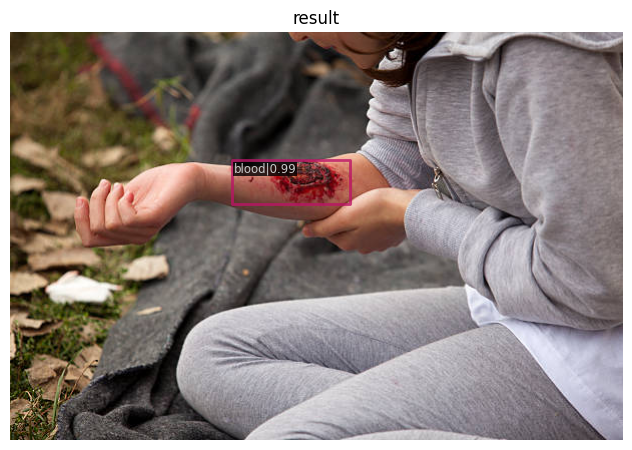

In [113]:
import cv2
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Loading a sample image for inference
img = cv2.imread('/content/data/blood/normal_cases/jpg/img_hod_000001.jpg')

# Setting the configuration for the model
model.cfg = cfg

# Performing inference on the sample image
result = inference_detector(model, img)

# Visualizing the inference results
show_result_pyplot(model, img, result)

In [139]:
from mmdet.apis import single_gpu_test, init_detector, show_result_pyplot
from mmcv.runner import load_checkpoint


In [167]:
# Load the configuration file
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/voc2coco/tutorial_exps_normal/epoch_20.pth'

In [168]:
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/voc2coco/tutorial_exps_normal/epoch_20.pth


In [169]:
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)
test_data = build_dataset(cfg.data.test)
data_loader = build_dataloader(
        test_data,
        # Must set the samples_per_gpu argument value to 1
        # samples_per_gpu=cfg.data.samples_per_gpu,
        samples_per_gpu=1,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
